In [58]:
'''
Cho dữ liệu Automobile_data.csv (link tham khảo và dowload https://www.kaggle.com/toramky/automobile-dataset?select=Automobile_data.csv )

Yêu cầu:
Đọc dữ liệu. Hiển thị các thông tin chung về dữ liệu

Cho biết có bao nhiêu giá trị trong cột 'price' là chuỗi số, bao nhiêu giá trị không là chuỗi số. 
Cho biết vị trí các dòng chứa 'price' không phải là chuỗi số.
Thay thế những 'price' không phải là chuỗi số này bằng giá trị median của 'price'. Đổi cột 'price' sang kiểu số.

Thực hiện tương tự 2. và 3. cho các cột 'horsepower', normalized-losses

Tìm hiểu xu hướng trung tâm của các cột 'height', 'price'

Trực quan hóa phân phối của các cột 'height', 'price'. Nhận xét.

Trực quan hóa mối quan hệ giữa 'horsepower' and 'price'
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

In [60]:
auto = pd.read_csv('data1/Automobile_data.csv')
print(auto.info())
print('===============================================================')
auto

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [62]:
#The "price" column type is "object"
#But when display, they are numerical
#=> So, there must be some where the "price" contains non-numeric value
print(auto['price'].str.isnumeric().value_counts())

print()
print('So, there are 4 non-numeric values in the "price" column')

price
True     201
False      4
Name: count, dtype: int64

So, there are 4 non-numeric values in the "price" column


In [70]:
#Show the non-numeric rows of "price"
auto.price[auto['price'].str.isnumeric() == False]

9      ?
44     ?
45     ?
129    ?
Name: price, dtype: object

In [66]:
#Check the index=9 row of 'price'
auto.price.loc[9] #So it's a string ('?')

'?'

In [68]:
#Try with "price" column

auto_x = pd.read_csv('data1/Automobile_data.csv')

#Replace the '?' in "price" with the median of remaining data
median_price = auto_x.price[auto_x['price'].str.isnumeric() == True].astype(float).median()
print('Median of numeric values from "price" column:',median_price)

auto_x.price[auto_x['price'].str.isnumeric() == False] = median_price #Replace the non-numeric values with median of "price"

print('\nReplace the non-numeric values:')
for i in [9,44,45,129]:
    print(f'auto.price.loc[{i}] = {auto_x.price.loc[i]}')

print('\nConvert "price" column to float:')
auto_x.price.astype(float) #change the type of "price" to float

Median of numeric values from "price" column: 10295.0

Replace the non-numeric values:
auto.price.loc[9] = 10295.0
auto.price.loc[44] = 10295.0
auto.price.loc[45] = 10295.0
auto.price.loc[129] = 10295.0

Convert "price" column to float:


0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [104]:
auto_new = pd.read_csv('data1/Automobile_data.csv')

#Now use for loop to do the same for "price" abd "horsepower" and "normalized-loss" columns:
for col in ["price","horsepower", "normalized-losses"]:
    print(f'----------------{col}--------------------------')
    condition = (auto_new[col].str.isnumeric() == False) #The condition to find the non-numeric rows
    print(auto_new[col].str.isnumeric().value_counts())
    
    median = auto[col][~condition].astype(float).median() #Calculate median from numeric value
                                                          #The ~condition is negation of "condition", to find numeric values
                                                          #In pandas, have to use ~condition instead of (not condition)

    print(f'\n{col} median = {median}')
    
    auto_new[col][condition] = median #replace non-numeric with median
    auto_new[col] = auto_new[col].astype(float) #Convert the column to "float" type
    print('\nReplacing completed')

print()
auto_new[["price","horsepower", "normalized-losses"]].info() #Check the cleaning results

----------------price--------------------------
price
True     201
False      4
Name: count, dtype: int64

price median = 10295.0

Replacing completed
----------------horsepower--------------------------
horsepower
True     203
False      2
Name: count, dtype: int64

horsepower median = 95.0

Replacing completed
----------------normalized-losses--------------------------
normalized-losses
True     164
False     41
Name: count, dtype: int64

normalized-losses median = 115.0

Replacing completed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              205 non-null    float64
 1   horsepower         205 non-null    float64
 2   normalized-losses  205 non-null    float64
dtypes: float64(3)
memory usage: 4.9 KB


In [109]:
#Centralism of 'height', 'price' columns

for col in ['height', 'price']:
    print(f'--------------------{col}------------------------')
    print(f'Mean {col} = {auto_new[col].mean()}')
    print(f'Median {col} = {auto_new[col].median()}')
    print(f'Mode {col} = {auto_new[col].mode()}')

--------------------height------------------------
Mean height = 53.72487804878049
Median height = 54.1
Mode height = 0    50.8
Name: height, dtype: float64
--------------------price------------------------
Mean price = 13150.307317073171
Median price = 10295.0
Mode price = 0    10295.0
Name: price, dtype: float64


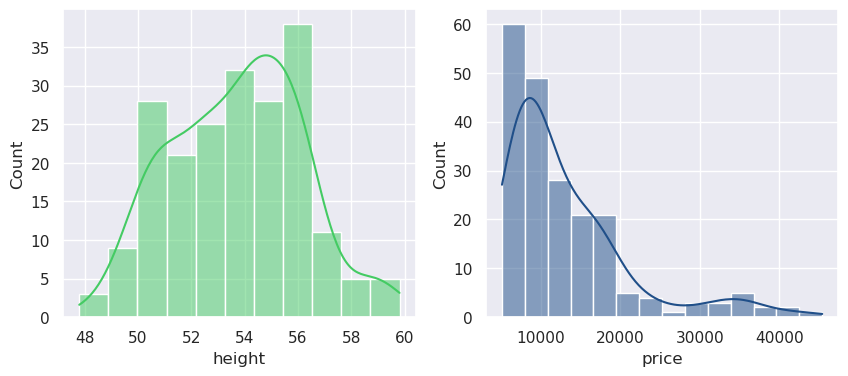


Comments: The "height" distribution is less skewd than the "price"


In [144]:
#Trực quan hóa phân phối của các cột 'height', 'price'. Nhận xét.
import random
cols = ['height', 'price']
random.seed(1)
plt.figure(figsize=(10,4))
for i in range(len(cols)):
    color = "#{:06x}".format(random.randint(0,0xFFFFFF))
    plt.subplot(1,2,i+1)
    sbn.set_theme(style='darkgrid')
    sbn.histplot(auto_new[cols[i]], kde=True, color=color)

plt.show()

print('\nComments: The "height" distribution is less skewd than the "price"')

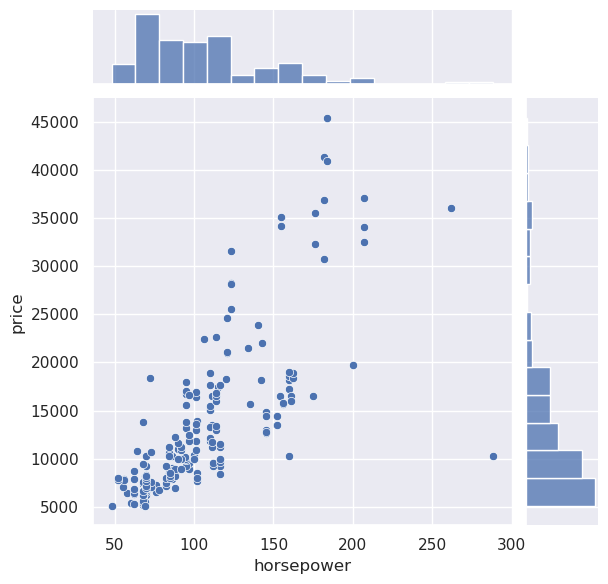


Comment: The 'horsepower' and 'price' seem positively correlated


In [158]:
#Trực quan hóa mối quan hệ giữa 'horsepower' and 'price'
sbn.jointplot(data=auto_new, x='horsepower', y='price')
plt.show()
print("\nComment: The 'horsepower' and 'price' seem positively correlated")